# Imports

In [96]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, classification_report, confusion_matrix, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

# Data Exploration

In [97]:
X = pd.read_csv("data_Features.csv")
X.head()

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR
0,2013-01-01,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0
1,2013-01-02,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0
2,2013-01-03,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0
3,2013-01-04,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0
4,2013-01-05,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0


In [98]:
X.describe()

,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,-10.190040,0.139648,0.626351,-0.858922,73.267808,18.789275,11.522362,1.328740,4.382248,5.191286
std,10.340583,5.013640,3.955417,1.446165,29.250724,47.703600,27.942124,3.393452,12.971518,13.406972
min,-32.019122,-13.846656,-12.316128,-1.692462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-19.877500,-3.610168,-2.079422,-1.689860,70.000000,0.123798,0.121437,0.000000,0.000000,0.000000
50%,-9.596479,-0.187084,0.912780,-1.689860,84.601769,0.481870,0.481870,0.000000,0.000000,0.000000
75%,0.167824,3.807440,3.483397,-0.297573,90.362319,4.080174,3.961181,0.004413,0.010148,0.000150
max,7.840619,14.640913,12.811255,6.054536,99.500682,479.722174,281.673389,23.241791,115.876574,88.054318


In [99]:
X.columns

Index(['time', 't2m', 'u10', 'v10', 'SST', 'SIC', 'r1_MAR', 'r2_MAR', 'r3_MAR',
       'r4_MAR', 'r5_MAR'],
      dtype='object')

In [100]:
X['time'] = pd.to_datetime(X['time'])

In [101]:
X.head()

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR
0,2013-01-01,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0
1,2013-01-02,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0
2,2013-01-03,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0
3,2013-01-04,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0
4,2013-01-05,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0


In [102]:
#--FEATURE ENGINEERING--
X['hour'] = X['time'].dt.hour
X['dayofweek'] = X['time'].dt.dayofweek
X['dayofyear'] = X['time'].dt.dayofyear
X['month'] = X['time'].dt.month

In [103]:
X = X.drop(columns=['time'])

In [104]:
y = pd.read_csv("data_Targets.csv")

In [105]:
X.dtypes

t2m          float64
u10          float64
v10          float64
SST          float64
SIC          float64
r1_MAR       float64
r2_MAR       float64
r3_MAR       float64
r4_MAR       float64
r5_MAR       float64
hour           int32
dayofweek      int32
dayofyear      int32
month          int32
dtype: object

In [106]:
y.head()

,Unnamed: 0,Y1,Y3,Y4,Y5
0,2013-01-01,0,5,0,0
1,2013-01-02,0,0,0,0
2,2013-01-03,0,0,0,0
3,2013-01-04,0,2,0,0
4,2013-01-05,0,0,0,0


In [107]:
y.rename(columns={"Unnamed: 0" : "time"})

,time,Y1,Y3,Y4,Y5
0,2013-01-01,0,5,0,0
1,2013-01-02,0,0,0,0
2,2013-01-03,0,0,0,0
3,2013-01-04,0,2,0,0
4,2013-01-05,0,0,0,0
...,...,...,...,...,...
2551,2019-12-27,3,0,1,0
2552,2019-12-28,0,0,0,0
2553,2019-12-29,0,0,0,0
2554,2019-12-30,0,0,1,0


In [108]:
y = y["Y1"]

In [109]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2551    3
2552    0
2553    0
2554    0
2555    0
Name: Y1, Length: 2556, dtype: int64

In [110]:
print(set(y.values))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 63, 65, 71, 72, 73, 79, 81, 84, 85, 87, 92, 94, 95, 96, 98, 100, 103, 109, 112, 113, 114, 119, 123, 126, 132, 135, 139, 168, 186, 227, 245, 256, 433}


<Axes: >

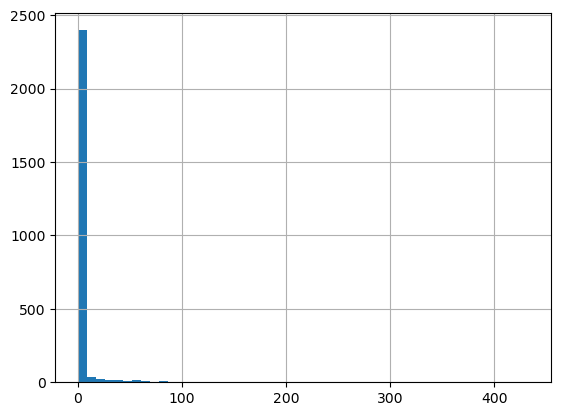

In [111]:
y.hist(bins=50)

In [112]:
print(y.describe())

count    2556.000000
mean        3.525430
std        18.977537
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       433.000000
Name: Y1, dtype: float64


In [113]:
y_bin = (y > 0).astype(int)

In [114]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_bin),
    y=y_bin
)
print(dict(zip(np.unique(y_bin), class_weights)))

{0: 0.5649867374005305, 1: 4.346938775510204}


In [115]:
weights = np.array([class_weights[y_i] for y_i in y_bin])

In [116]:
y_bin

0       0
1       0
2       0
3       0
4       0
       ..
2551    1
2552    0
2553    0
2554    0
2555    0
Name: Y1, Length: 2556, dtype: int64

In [117]:
X

,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,hour,dayofweek,dayofyear,month
0,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0,0,1,1,1
1,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0,0,2,2,1
2,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0,0,3,3,1
3,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0,0,4,4,1
4,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0,0,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,-27.316822,1.597207,-0.091400,-1.689860,95.102792,0.466891,0.462179,0.0,0.0,0.0,0,4,361,12
2552,-27.998255,3.917396,0.498397,-1.690511,93.949257,0.466818,0.462108,0.0,0.0,0.0,0,5,362,12
2553,-23.289798,4.664877,2.332191,-1.689860,93.989076,0.417442,0.414464,0.0,0.0,0.0,0,6,363,12
2554,-25.674814,0.062261,3.760923,-1.689860,94.875746,0.306203,0.306203,0.0,0.0,0.0,0,0,364,12


In [118]:
X.dtypes

t2m          float64
u10          float64
v10          float64
SST          float64
SIC          float64
r1_MAR       float64
r2_MAR       float64
r3_MAR       float64
r4_MAR       float64
r5_MAR       float64
hour           int32
dayofweek      int32
dayofyear      int32
month          int32
dtype: object

In [119]:
X.shape

(2556, 14)

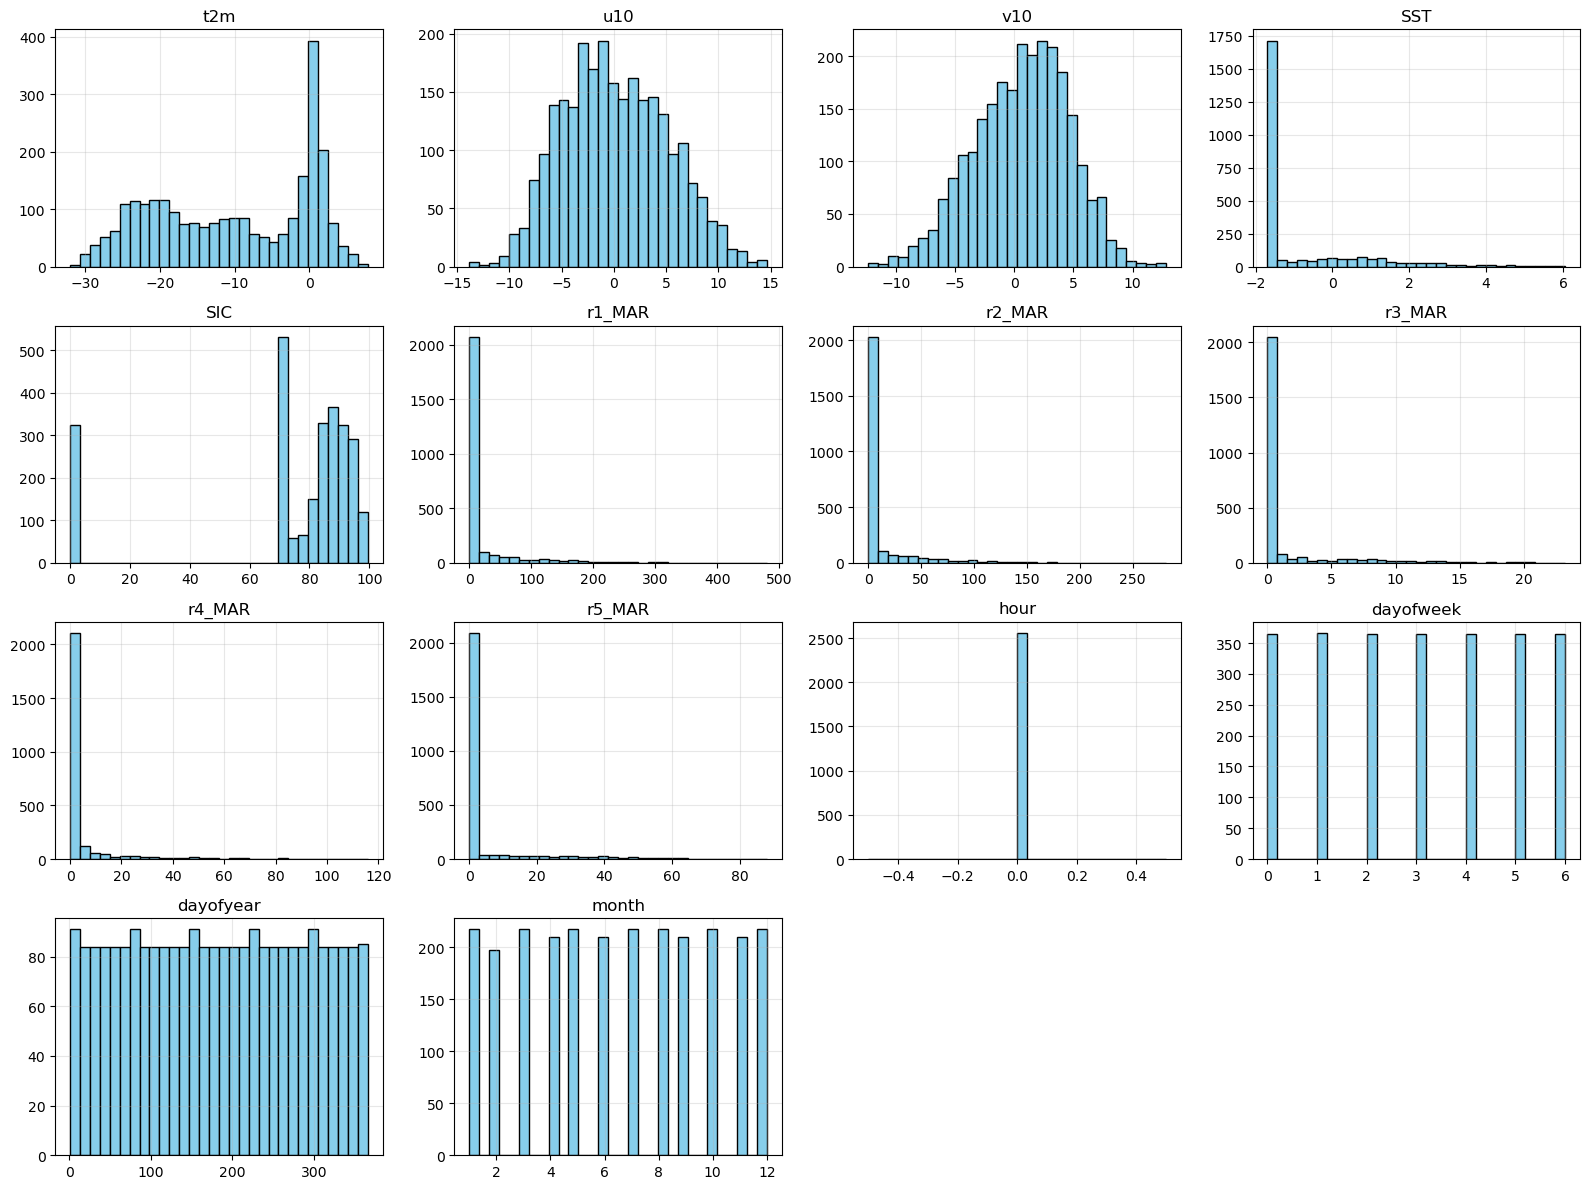

In [120]:
n_features = X.shape[1]
n_cols = 4  
n_rows = int(np.ceil(n_features / n_cols))  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3 * n_rows))

axes = axes.flatten()

for i, col in enumerate(X.columns):
    axes[i].hist(X[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].grid(alpha=0.3)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Test of different models

## Naive Bayes

### 1st try

In [121]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test, w_train, w_test= train_test_split(X, y_bin, weights, test_size=0.2,random_state=42)

model = GaussianNB()
model.fit(X_train,y_train, sample_weight=w_train)
y_pred = model.predict(X_test)

In [122]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.908203125
0.5507246376811594
0.7037037037037037
0.6178861788617886


### Cross Validation

In [123]:
kf = KFold(n_splits=5)

kf.get_n_splits(X)

scoring = {
    'accuracy': 'accuracy',
    'auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {key: [] for key in scoring.keys()}

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_bin[train_idx], y_bin[test_idx]
    w_train = weights[train_idx]

    # Modèle Naive Bayes avec pondération
    model = GaussianNB()
    model.fit(X_train, y_train, sample_weight=w_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # nécessaire pour roc_auc

    # Calcul des scores
    results['accuracy'].append(accuracy_score(y_test, y_pred))
    results['auc'].append(roc_auc_score(y_test, y_proba))
    results['f1'].append(f1_score(y_test, y_pred))
    results['precision'].append(precision_score(y_test, y_pred))
    results['recall'].append(recall_score(y_test, y_pred))

# Moyennes sur les folds
for metric in results:
    print(f"{metric}: {np.mean(results[metric]):.4f}")

accuracy: 0.9128
auc: 0.8437
f1: 0.6601
precision: 0.5940
recall: 0.7443


In [124]:
# cv_results

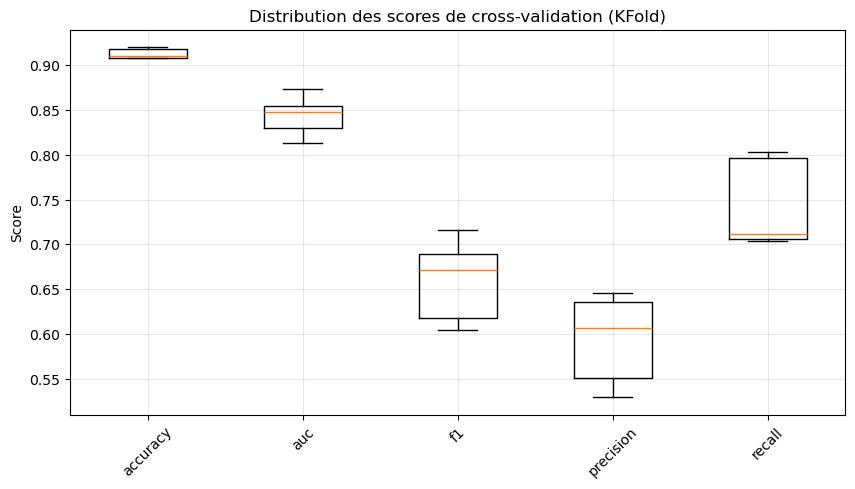

In [125]:
# Récupération des clés et valeurs
keys = list(results.keys())
values = [results[key] for key in keys]

plt.figure(figsize=(10, 5))
plt.boxplot(values)
plt.xticks(range(1, len(keys) + 1), keys, rotation=45)
plt.title("Distribution des scores de cross-validation (KFold)")
plt.ylabel("Score")
plt.grid(True, alpha=0.3)
plt.show()

### Normalization of the data

In [126]:
model = make_pipeline(StandardScaler(), GaussianNB())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [127]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9275929549902152
0.6774193548387096
0.711864406779661
0.6942148760330579


### Metrics : Confusion Matrix, ROC Indicator and AUC curb

In [128]:
confusion_matrix(y_test,y_pred)

array([[432,  20],
       [ 17,  42]])

In [129]:
y_score = model.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y_bin, y_score)
auc(fpr,tpr)

0.8474094323848018

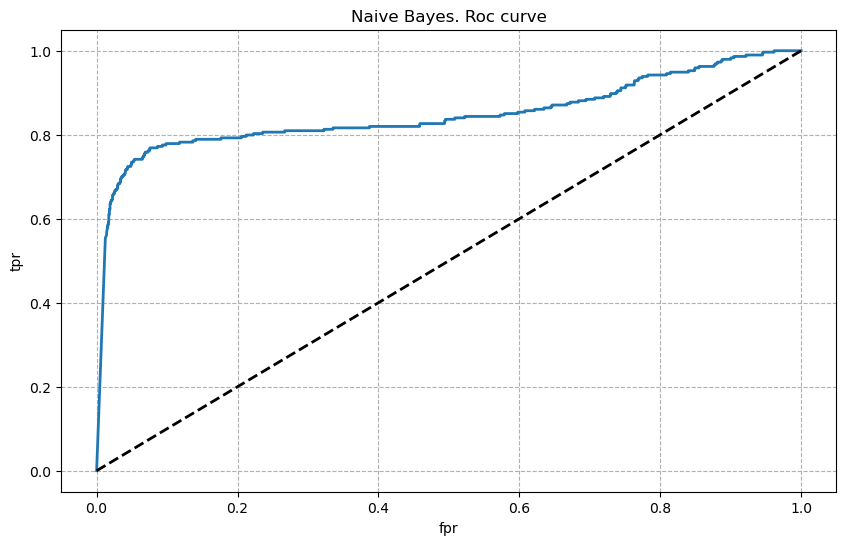

In [130]:
y_proba= model.predict_proba(X)[:,1];
fpr, tpr, thresholds= roc_curve(y_bin, y_proba);
figure= plt.figure(figsize=(10,6));
plt.plot(fpr,tpr, linewidth= 2);
plt.title('Naive Bayes. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth= 2)
plt.grid(linestyle= 'dashed') 
plt.show()

## Linear Discriminant Analysis

### 1st attempt

In [131]:
X_train, X_test, y_train, y_test= train_test_split(X, y_bin, test_size=0.2,random_state=42)

lda = LinearDiscriminantAnalysis(n_components=1, store_covariance=True)

lda.fit(X_train,y_train)
y_pred_train = lda.predict(X_train)
y_pred = lda.predict(X_test)

In [132]:
acc = accuracy_score(y_train, y_pred_train)
prec = precision_score(y_train, y_pred_train, average='weighted')
rec = recall_score(y_train, y_pred_train, average='weighted')
f1 = f1_score(y_train, y_pred_train, average='weighted')

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")

print("\nClassification Report:\n", classification_report(y_train, y_pred_train))

Accuracy: 0.945
Precision: 0.943
Recall: 0.945
F1-score: 0.943

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1804
           1       0.82      0.69      0.75       240

    accuracy                           0.95      2044
   macro avg       0.89      0.83      0.86      2044
weighted avg       0.94      0.95      0.94      2044



In [133]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.941
Precision: 0.938
Recall: 0.941
F1-score: 0.939

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       458
           1       0.77      0.63      0.69        54

    accuracy                           0.94       512
   macro avg       0.86      0.80      0.83       512
weighted avg       0.94      0.94      0.94       512



### Cross Validation

In [134]:
kf = KFold(n_splits=5)

kf.get_n_splits(X)

scoring = {
    'accuracy': 'accuracy',
    'auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

cv_results = cross_validate(lda, X, y_bin, cv=kf, scoring=scoring, return_train_score=True)

In [135]:
cv_results

{'fit_time': array([0.01162291, 0.00243831, 0.00222707, 0.00220203, 0.00213504]),
 'score_time': array([0.00687885, 0.00348282, 0.00345206, 0.00328112, 0.00337386]),
 'test_accuracy': array([0.9453125 , 0.95694716, 0.94911937, 0.92759295, 0.92759295]),
 'train_accuracy': array([0.9427593 , 0.9393643 , 0.94180929, 0.94914425, 0.95110024]),
 'test_auc': array([0.72192254, 0.95666211, 0.85094192, 0.72695906, 0.87674419]),
 'train_auc': array([0.90127043, 0.84380627, 0.88982854, 0.90551051, 0.88388258]),
 'test_f1': array([0.44      , 0.86419753, 0.7173913 , 0.49315068, 0.74829932]),
 'train_f1': array([0.75975359, 0.66120219, 0.72643678, 0.77777778, 0.74226804]),
 'test_precision': array([0.55      , 0.92105263, 0.91666667, 0.48648649, 0.90163934]),
 'train_precision': array([0.82959641, 0.76582278, 0.80203046, 0.86666667, 0.8       ]),
 'test_recall': array([0.36666667, 0.81395349, 0.58928571, 0.5       , 0.63953488]),
 'train_recall': array([0.70075758, 0.58173077, 0.66386555, 0.7054263

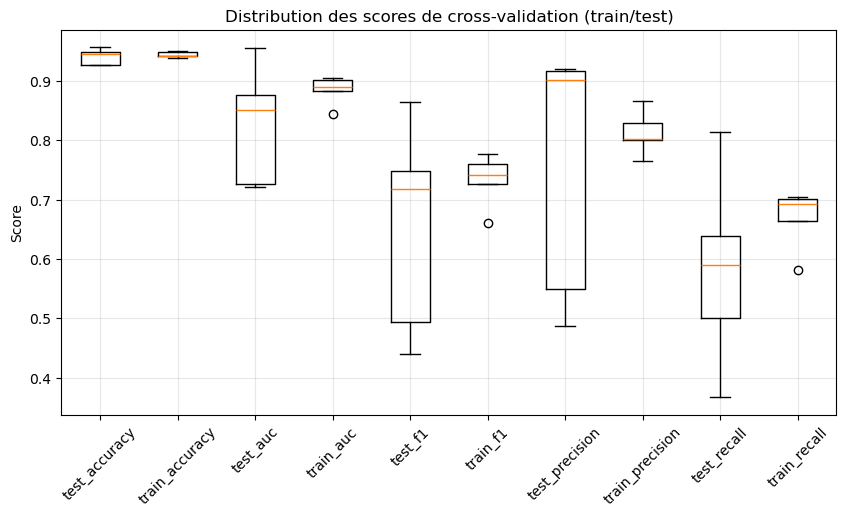

In [136]:
keys = [key for key in cv_results.keys() if key.startswith('test') or key.startswith('train')]
values = [cv_results[key] for key in keys]

plt.figure(figsize=(10, 5))
plt.boxplot(values)
plt.xticks(range(1, len(keys) + 1), keys, rotation=45)
plt.title("Distribution des scores de cross-validation (train/test)")
plt.ylabel("Score")
plt.grid(True, alpha=0.3)
plt.show()

### ROC Curb

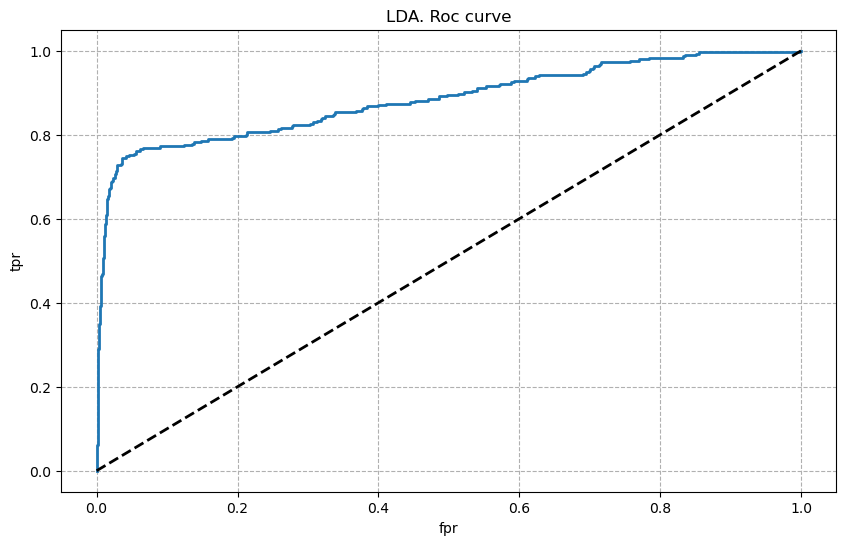

In [137]:
y_proba= lda.predict_proba(X)[:,1]
fpr, tpr, thresholds= roc_curve(y_bin, y_proba)
figure= plt.figure(figsize=(10,6))
plt.plot(fpr,tpr, linewidth= 2)
plt.title('LDA. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth= 2)
plt.grid(linestyle= 'dashed') 
plt.show()

### Weighted Observations

In [138]:
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y_bin, weights, test_size=0.2, random_state=42
)

In [139]:
def weighted_lda_fit(X, y, sample_weight, reg=1e-6):
    """
    Weighted Linear Discriminant Analysis (stable version)
    """
    classes = np.unique(y)
    n_features = X.shape[1]
    mean_overall = np.average(X, axis=0, weights=sample_weight)

    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))

    for c in classes:
        X_c = X[y == c]
        w_c = sample_weight[y == c]
        mean_c = np.average(X_c, axis=0, weights=w_c)
        S_W += (w_c[:, None] * (X_c - mean_c)).T @ (X_c - mean_c)
        n_c = np.sum(w_c)
        mean_diff = (mean_c - mean_overall).reshape(-1, 1)
        S_B += n_c * (mean_diff @ mean_diff.T)

    # --- Régularisation + pseudo-inverse ---
    S_W_reg = S_W + reg * np.eye(n_features)
    eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(S_W_reg) @ S_B)

    W = eigvecs[:, np.argsort(eigvals)[::-1]].real
    return W[:, :1]

In [140]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

W = weighted_lda_fit(X_train_scaled, y_train, w_train)

In [141]:
X_train_proj = X_train @ W
X_test_proj = X_test @ W

In [142]:
clf = LogisticRegression()
clf.fit(X_train_proj, y_train, sample_weight=w_train)

y_pred_train = clf.predict(X_train_proj)
y_pred = clf.predict(X_test_proj)

In [143]:
print(accuracy_score(y_test,y_pred))

0.583984375


In [144]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.56      0.71       458
           1       0.18      0.81      0.29        54

    accuracy                           0.58       512
   macro avg       0.57      0.69      0.50       512
weighted avg       0.88      0.58      0.66       512



## Quadratic Discriminant Analysis

### Naive Attempt

In [145]:
X_train, X_test, y_train, y_test, w_train, w_train = train_test_split(X,y_bin, weights, test_size=0.2, random_state=42)

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train,y_train)
y_pred = qda.predict(X_test)

/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [146]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       458
           1       0.40      0.07      0.12        54

    accuracy                           0.89       512
   macro avg       0.65      0.53      0.53       512
weighted avg       0.85      0.89      0.86       512



In [147]:
accuracy_score(y_test, y_pred)

0.890625

### Cross Validation

In [148]:
kf = KFold(n_splits=5)

kf.get_n_splits(X)

scoring = {
    'accuracy': 'accuracy',
    'auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

cv_results = cross_validate(qda, X, y_bin, cv=kf, scoring=scoring, return_train_score=True)

/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might h

In [149]:
cv_results

{'fit_time': array([0.00495911, 0.00314498, 0.00174212, 0.00208426, 0.00161099]),
 'score_time': array([0.01307201, 0.00677705, 0.00350499, 0.00397778, 0.00370002]),
 'test_accuracy': array([0.50976562, 0.63013699, 0.88454012, 0.87279843, 0.86692759]),
 'train_accuracy': array([0.53082192, 0.68753056, 0.88655257, 0.84498778, 0.90464548]),
 'test_auc': array([0.57399723, 0.50068399, 0.419427  , 0.45672515, 0.59731874]),
 'train_auc': array([0.65560734, 0.50886426, 0.56656653, 0.57986188, 0.50349912]),
 'test_f1': array([0.10676157, 0.25296443, 0.16901408, 0.05797101, 0.37037037]),
 'train_f1': array([0.27403482, 0.18390805, 0.2       , 0.28117914, 0.20408163]),
 'test_precision': array([0.05976096, 0.19161677, 0.4       , 0.06060606, 0.90909091]),
 'train_precision': array([0.17123936, 0.12521739, 0.55769231, 0.33879781, 0.67567568]),
 'test_recall': array([0.5       , 0.37209302, 0.10714286, 0.05555556, 0.23255814]),
 'train_recall': array([0.68560606, 0.34615385, 0.12184874, 0.2403100

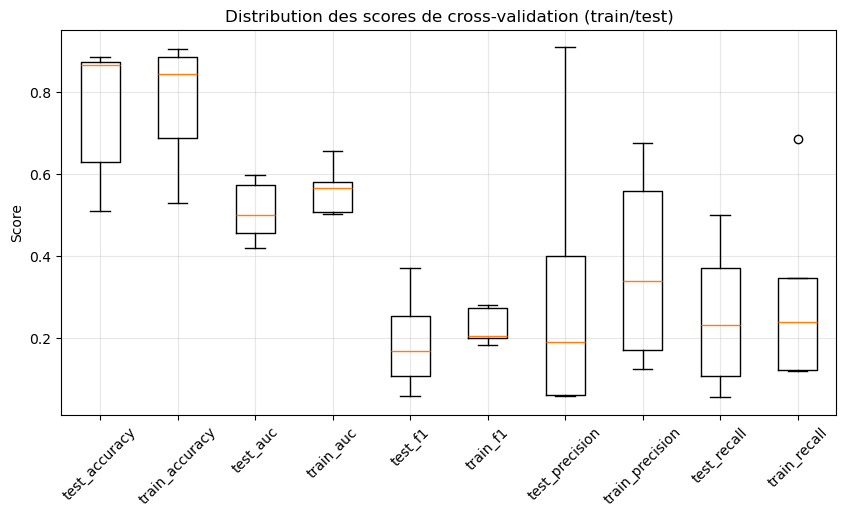

In [150]:
keys = [key for key in cv_results.keys() if key.startswith('test') or key.startswith('train')]
values = [cv_results[key] for key in keys]

plt.figure(figsize=(10, 5))
plt.boxplot(values)
plt.xticks(range(1, len(keys) + 1), keys, rotation=45)
plt.title("Distribution des scores de cross-validation (train/test)")
plt.ylabel("Score")
plt.grid(True, alpha=0.3)
plt.show()

### ROC Curb

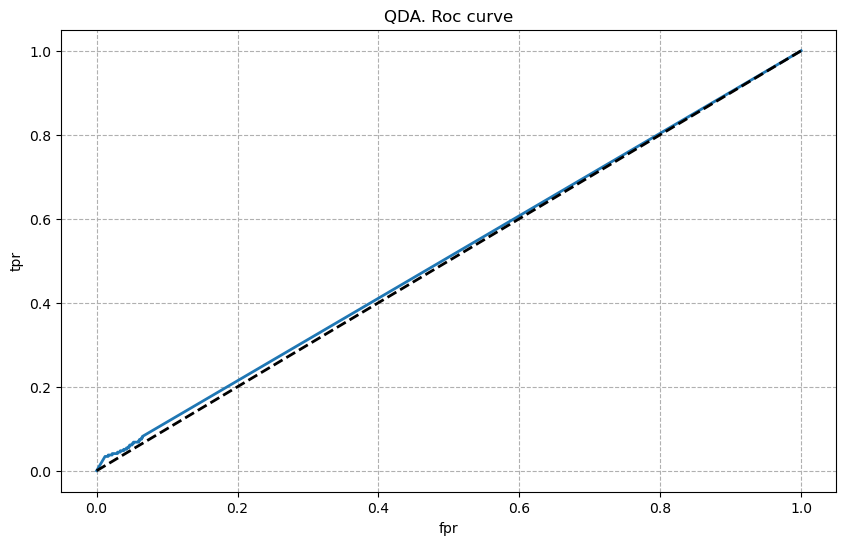

In [151]:
y_proba= qda.predict_proba(X)[:,1]
fpr, tpr, thresholds= roc_curve(y_bin, y_proba)
figure= plt.figure(figsize=(10,6))
plt.plot(fpr,tpr, linewidth= 2)
plt.title('QDA. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth= 2)
plt.grid(linestyle= 'dashed') 
plt.show()

## Logistic Regression

### Naive Attempt

In [152]:
X_train,X_test,y_train,y_test, w_train, w_test= train_test_split(X, y_bin, weights, test_size=0.2,random_state=42)

logreg= linear_model.LogisticRegression(C=1e5,max_iter=1000)

logreg.fit(X_train,y_train, sample_weight=w_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,100000.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [153]:
y_pred = logreg.predict(X_test)

In [154]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       458
           1       0.72      0.70      0.71        54

    accuracy                           0.94       512
   macro avg       0.84      0.84      0.84       512
weighted avg       0.94      0.94      0.94       512



In [155]:
accuracy_score(y_test,y_pred)

0.939453125

### Cross Validation

In [156]:
kf = KFold(n_splits=5)

kf.get_n_splits(X)

scoring = {
    'accuracy': 'accuracy',
    'auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

cv_results = cross_validate(logreg, X, y_bin, cv=kf, scoring=scoring, return_train_score=True)

In [157]:
cv_results

{'fit_time': array([0.07185006, 0.05687809, 0.05676484, 0.05644011, 0.06380224]),
 'score_time': array([0.00350094, 0.00366306, 0.00334907, 0.00337672, 0.0035708 ]),
 'test_accuracy': array([0.94335938, 0.94520548, 0.94716243, 0.9295499 , 0.93150685]),
 'train_accuracy': array([0.94373777, 0.9398533 , 0.93740831, 0.94767726, 0.94718826]),
 'test_auc': array([0.71556017, 0.95863201, 0.85074568, 0.71508772, 0.8493844 ]),
 'train_auc': array([0.90798221, 0.85099556, 0.89349077, 0.90925201, 0.88651281]),
 'test_f1': array([0.40816327, 0.81578947, 0.7032967 , 0.47058824, 0.75177305]),
 'train_f1': array([0.75687104, 0.64553314, 0.69082126, 0.76989247, 0.7032967 ]),
 'test_precision': array([0.52631579, 0.93939394, 0.91428571, 0.5       , 0.96363636]),
 'train_precision': array([0.85645933, 0.8057554 , 0.8125    , 0.8647343 , 0.82051282]),
 'test_recall': array([0.33333333, 0.72093023, 0.57142857, 0.44444444, 0.61627907]),
 'train_recall': array([0.6780303 , 0.53846154, 0.60084034, 0.6937984

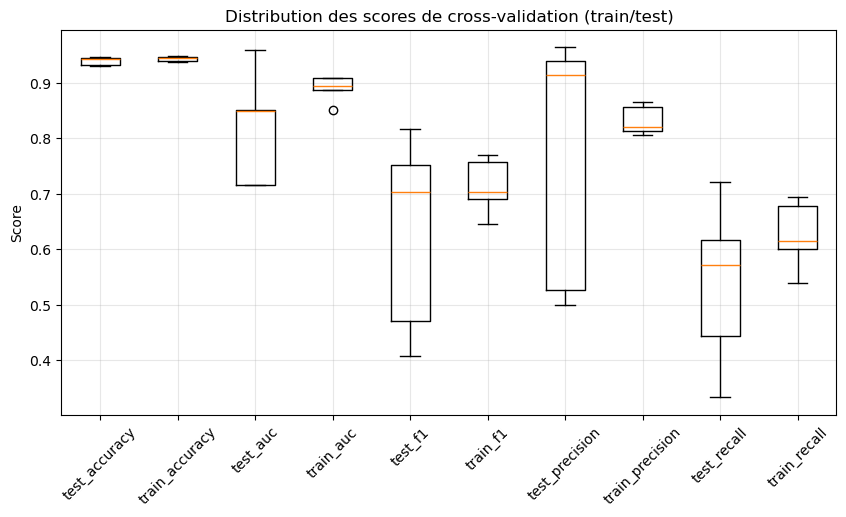

In [158]:
keys = [key for key in cv_results.keys() if key.startswith('test') or key.startswith('train')]
values = [cv_results[key] for key in keys]

plt.figure(figsize=(10, 5))
plt.boxplot(values)
plt.xticks(range(1, len(keys) + 1), keys, rotation=45)
plt.title("Distribution des scores de cross-validation (train/test)")
plt.ylabel("Score")
plt.grid(True, alpha=0.3)
plt.show()

### ROC Curb

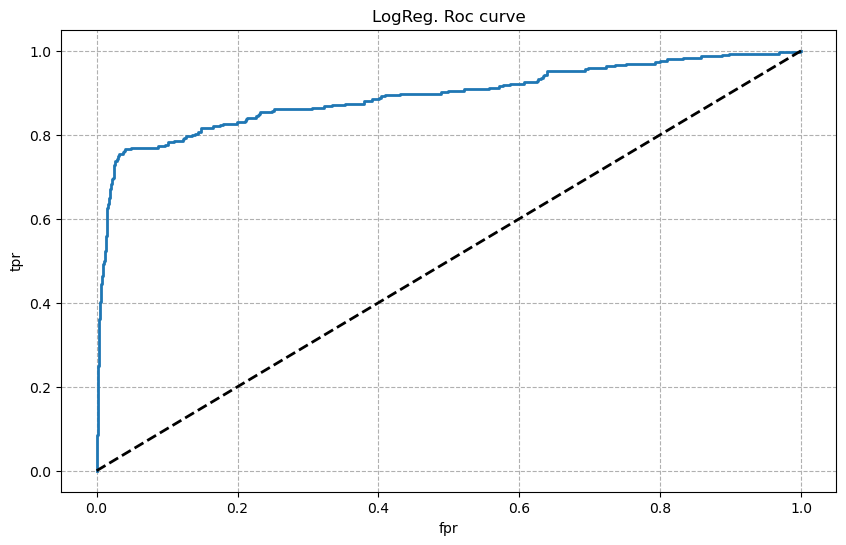

In [159]:
y_proba= logreg.predict_proba(X)[:,1]
fpr, tpr, thresholds= roc_curve(y_bin, y_proba)
figure= plt.figure(figsize=(10,6))
plt.plot(fpr,tpr, linewidth= 2)
plt.title('LogReg. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth= 2)
plt.grid(linestyle= 'dashed') 
plt.show()

## K-NN model

### Naive Attempt

In [160]:
knn= KNeighborsClassifier(n_neighbors=5)

X_train, X_test, y_train, y_test = train_test_split(X,y_bin, test_size=0.2, random_state=42)

knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [161]:
y_pred = knn.predict(X_test)

In [162]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9453125
Precision: 0.9417439088983051
Recall: 0.9453125
F1-score: 0.9416516529398307


In [163]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       458
           1       0.82      0.61      0.70        54

    accuracy                           0.95       512
   macro avg       0.89      0.80      0.84       512
weighted avg       0.94      0.95      0.94       512



### Cross Validation

In [164]:
kf = KFold(n_splits=5)

kf.get_n_splits(X)

scoring = {
    'accuracy': 'accuracy',
    'auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

cv_results = cross_validate(knn, X, y_bin, cv=kf, scoring=scoring, return_train_score=True)

In [165]:
cv_results

{'fit_time': array([0.00195289, 0.0009017 , 0.00092912, 0.00101471, 0.00096178]),
 'score_time': array([0.01292324, 0.0108254 , 0.01047182, 0.0113132 , 0.01115918]),
 'test_accuracy': array([0.94335938, 0.94129159, 0.91780822, 0.91780822, 0.92367906]),
 'train_accuracy': array([0.95205479, 0.94621027, 0.95061125, 0.95452323, 0.95647922]),
 'test_auc': array([0.67894191, 0.94805746, 0.87880691, 0.70915205, 0.8321751 ]),
 'train_auc': array([0.97951673, 0.96915566, 0.97773714, 0.98325113, 0.97848839]),
 'test_f1': array([0.43137255, 0.81012658, 0.61818182, 0.43243243, 0.73825503]),
 'train_f1': array([0.8       , 0.69101124, 0.76674365, 0.80503145, 0.77120823]),
 'test_precision': array([0.52380952, 0.88888889, 0.62962963, 0.42105263, 0.87301587]),
 'train_precision': array([0.86725664, 0.83108108, 0.85128205, 0.87671233, 0.82872928]),
 'test_recall': array([0.36666667, 0.74418605, 0.60714286, 0.44444444, 0.63953488]),
 'train_recall': array([0.74242424, 0.59134615, 0.69747899, 0.7441860

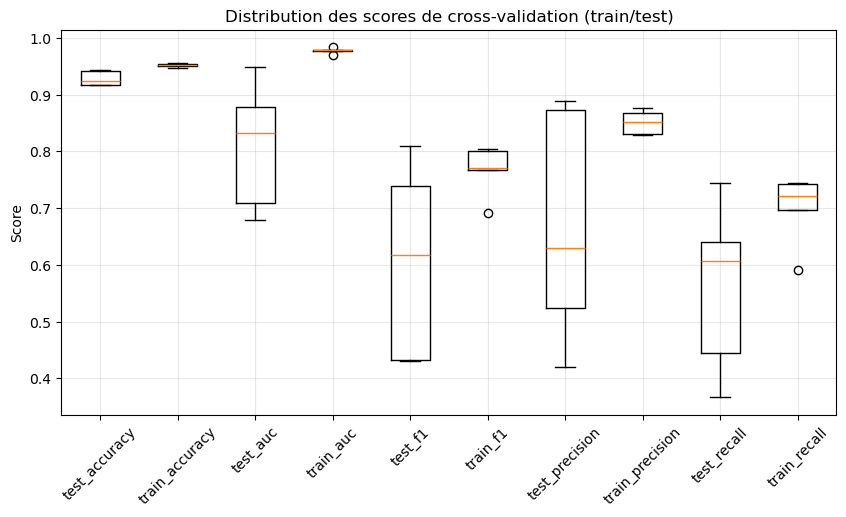

In [166]:
keys = [key for key in cv_results.keys() if key.startswith('test') or key.startswith('train')]
values = [cv_results[key] for key in keys]

plt.figure(figsize=(10, 5))
plt.boxplot(values)
plt.xticks(range(1, len(keys) + 1), keys, rotation=45)
plt.title("Distribution des scores de cross-validation (train/test)")
plt.ylabel("Score")
plt.grid(True, alpha=0.3)
plt.show()

### ROC Curve

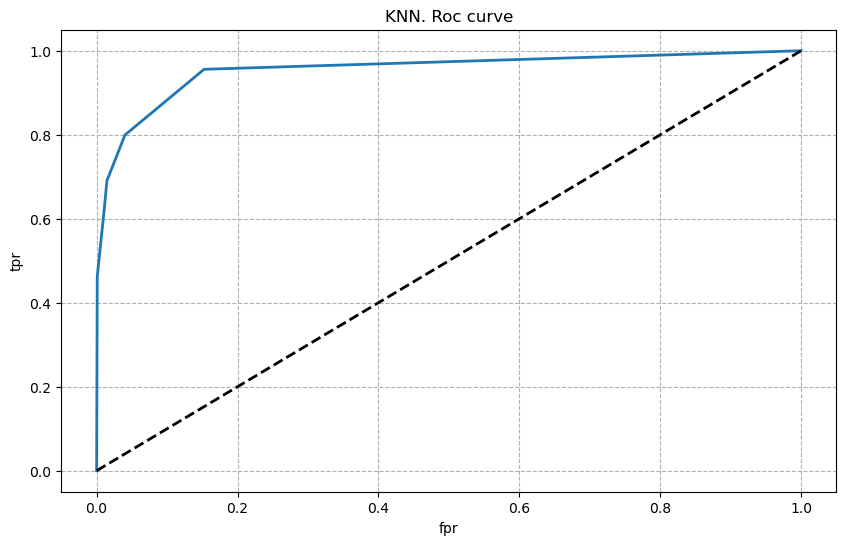

In [167]:
y_proba= knn.predict_proba(X)[:,1]
fpr, tpr, thresholds= roc_curve(y_bin, y_proba)
figure= plt.figure(figsize=(10,6))
plt.plot(fpr,tpr, linewidth= 2)
plt.title('KNN. Roc curve')
plt.xlabel('fpr');plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth= 2)
plt.grid(linestyle= 'dashed') 
plt.show()

## Decision Tree

### Simple Decision Tree Classifier

In [168]:
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y_bin, weights, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
treefit = model.fit(X_train, y_train, sample_weight=w_train)
y_pred = treefit.predict_proba(X_test)

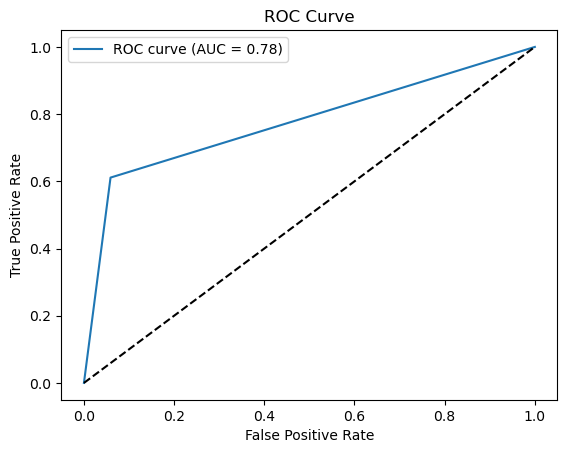

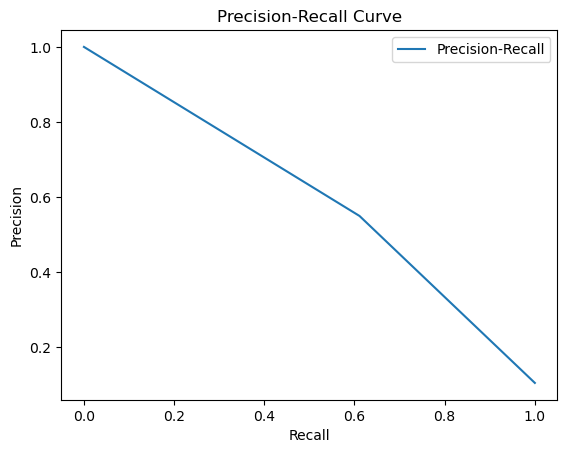

In [169]:
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1])
plt.plot(fpr, tpr, label="ROC curve (AUC = %.2f)" % roc_auc_score(y_test, y_pred[:, 1]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Courbe Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred[:, 1])
plt.plot(recall, precision, label="Precision-Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


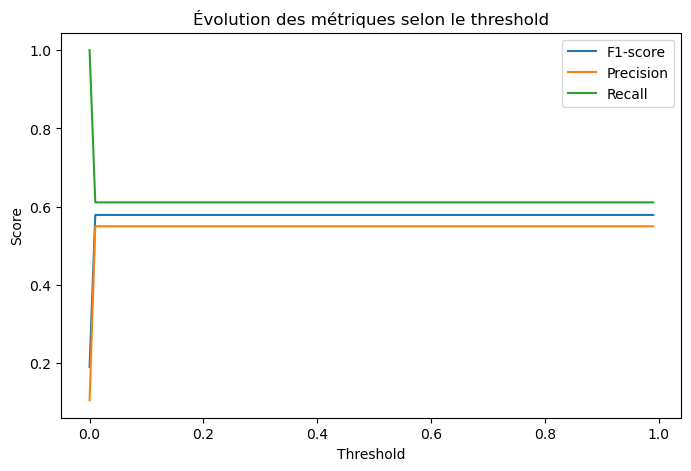

In [170]:
thresholds = np.arange(0.0, 1.0, 0.01)
f1_scores = []
precisions = []
recalls = []

for t in thresholds:
    y_pred_class = (y_pred[:, 1] >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_class))
    precisions.append(precision_score(y_test, y_pred_class))
    recalls.append(recall_score(y_test, y_pred_class))

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(thresholds, f1_scores, label="F1-score")
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Évolution des métriques selon le threshold")
plt.show()

In [171]:
best_t = thresholds[np.argmax(f1_scores)]
print("Meilleur seuil selon F1-score :", best_t)

Meilleur seuil selon F1-score : 0.01


In [172]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
J = tpr - fpr
best_t = thresholds[np.argmax(J)]
print("Seuil optimal selon Youden :", best_t)

Seuil optimal selon Youden : 1.0


In [173]:
y_pred_class = (y_pred[:, 1] > 0.01).astype(int)

print("Accuracy :", accuracy_score(y_test, y_pred_class))
print("Precision :", precision_score(y_test, y_pred_class))
print("Recall :", recall_score(y_test, y_pred_class))
print("F1-score :", f1_score(y_test, y_pred_class))
print("ROC-AUC :", roc_auc_score(y_test, y_pred[:, 1]))

print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred_class))
print("\nClassification Report :\n", classification_report(y_test, y_pred_class))

Accuracy : 0.90625
Precision : 0.55
Recall : 0.6111111111111112
F1-score : 0.5789473684210527
ROC-AUC : 0.7760795730228045

Confusion Matrix :
 [[431  27]
 [ 21  33]]

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       458
           1       0.55      0.61      0.58        54

    accuracy                           0.91       512
   macro avg       0.75      0.78      0.76       512
weighted avg       0.91      0.91      0.91       512



### Bagging Classifier

In [174]:
treemod = DecisionTreeClassifier()
bagg = BaggingClassifier(estimator=treemod, n_estimators=10, random_state=42)
bagg.fit(X_train, y_train, sample_weight=w_train)

,estimator,DecisionTreeClassifier()
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [175]:
y_pred = bagg.predict(X_test)

In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       458
           1       0.80      0.61      0.69        54

    accuracy                           0.94       512
   macro avg       0.88      0.80      0.83       512
weighted avg       0.94      0.94      0.94       512



## Random Forest

### Simple Random Forest Classifier

In [177]:
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X, y_bin, weights, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train,y_train, sample_weight=w_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [178]:
y_pred = rf.predict(X_test)

In [179]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       458
           1       0.82      0.61      0.70        54

    accuracy                           0.95       512
   macro avg       0.89      0.80      0.84       512
weighted avg       0.94      0.95      0.94       512



### Bagging

In [180]:
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X, y_bin, weights, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
bagg = BaggingClassifier(estimator=rf, n_estimators=10, random_state=42)

In [181]:
bagg.fit(X_train, y_train, sample_weight=w_train)

,estimator,RandomForestClassifier()
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [182]:
y_pred = bagg.predict(X_test)

In [183]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       458
           1       0.81      0.63      0.71        54

    accuracy                           0.95       512
   macro avg       0.88      0.81      0.84       512
weighted avg       0.94      0.95      0.94       512



## Extra Trees

### Simple Model

In [184]:
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X, y_bin, weights, test_size=0.2, random_state=42)

model = ExtraTreesClassifier(max_depth=10, random_state=42, bootstrap=True, oob_score=True)
model.fit(X_train, y_train, sample_weight=w_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [185]:
y_pred = model.predict(X_test)

In [186]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       458
           1       0.73      0.67      0.70        54

    accuracy                           0.94       512
   macro avg       0.85      0.82      0.83       512
weighted avg       0.94      0.94      0.94       512



### Bagging

In [187]:
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X, y_bin, weights, test_size=0.2, random_state=42)

ExT = ExtraTreesClassifier(max_depth=10, random_state=42, bootstrap=True, oob_score=True)
bagg = BaggingClassifier(estimator=ExT, n_estimators=10,random_state=42)
bagg.fit(X_train,y_train, sample_weight=w_train)

,estimator,ExtraTreesCla...ndom_state=42)
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [188]:
y_pred = bagg.predict(X_test)

In [189]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       458
           1       0.75      0.67      0.71        54

    accuracy                           0.94       512
   macro avg       0.86      0.82      0.84       512
weighted avg       0.94      0.94      0.94       512

